In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer

# Loading the training dataset
data = pd.read_csv('/content/Bank_Data.csv')

# Displaying basic information about the dataset
print(data.info())

data.head()

# Checking for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [ ]:
# Handling missing values in numerical and categorical columns
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Imputing missing numerical values with the median
data['Monthly_Inhand_Salary'] = num_imputer.fit_transform(data[['Monthly_Inhand_Salary']])
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data['Age'] = num_imputer.fit_transform(data[['Age']])

# Imputing missing categorical values with the mode
# Converting the DataFrame to a Series using .ravel()
data['Occupation'] = cat_imputer.fit_transform(data['Occupation'].values.reshape(-1, 1)).ravel()

# Encoding categorical variables
label_encoder = LabelEncoder()
data['Credit_Mix'] = label_encoder.fit_transform(data['Credit_Mix'])
data['Payment_Behaviour'] = label_encoder.fit_transform(data['Payment_Behaviour'])
data['Occupation'] = label_encoder.fit_transform(data['Occupation'])

# Dropping unnecessary columns (e.g., ID, Name, SSN, Month)
data.drop(columns=['ID', 'Customer_ID', 'Name', 'SSN', 'Month'], inplace=True)

# Checking the cleaned data
data.head()


,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,23.0,12,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,2022.0,1,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,6,186.26670208571772
1,24.0,12,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,...,4.0,1,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,2,361.44400385378196
2,24.0,12,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,...,4.0,1,809.98,33.811894,NaN,No,49.574949,148.23393788500925,5,264.67544623342997
3,34.0,12,19114.12,3086.305000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,...,4.0,1,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,2,343.82687322383634
4,28.0,15,34847.84,3037.986667,2,4,6,1,Credit-Builder Loan,3,...,5.0,1,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,1,485.2984336755923


In [ ]:
# Converting all numeric columns to numeric type, coercing invalid values to NaN
X = X.apply(pd.to_numeric, errors='coerce')

# Checking for any remaining non-numeric values or missing values
print(X.isnull().sum())

# Dropping columns that have too many missing values or are non-numeric like 'Type_of_Loan', 'Payment_of_Min_Amount'
X.drop(columns=['Type_of_Loan', 'Payment_of_Min_Amount', 'Credit_History_Age'], inplace=True)

# Option 1: Dropping rows with invalid numeric data (NaN)
X.dropna(inplace=True)
y = y[X.index]

# Re-splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling the features for models like SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Checking the cleaned dataset
print(X_train_scaled[:5])


Age                             0
Occupation                      0
Annual_Income                3520
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  2436
Type_of_Loan                50000
Delay_from_due_date             0
Num_of_Delayed_Payment       4925
Changed_Credit_Limit         1059
Num_Credit_Inquiries         1035
Outstanding_Debt              491
Credit_Utilization_Ratio        0
Credit_History_Age          50000
Payment_of_Min_Amount       50000
Total_EMI_per_month             0
Amount_invested_monthly      4446
Payment_Behaviour               0
Monthly_Balance               568
dtype: int64
[[-1.11033034e-01  3.18453154e-01 -5.25895673e-02  1.36551332e+00
  -1.20499130e-01 -1.52670472e-01 -1.37605125e-01 -3.12052483e-02
   4.01637758e-01 -8.08778137e-02 -3.13884132e-01 -1.28449615e-01
  -6.30392922e-01  1.33452313e+00 -1.68511059e-01 -3.53417819e-02
  -1.1998

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_log_reg, average='weighted')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_log_reg)}")

Logistic Regression Metrics:
Accuracy: 0.6191593352883675
Precision: 0.5503279009619003
Recall: 0.6191593352883675
F1 Score: 0.5693703763567676
Confusion Matrix:
[[1611    7  261  117]
 [   0 1738  756   12]
 [ 185  493 2920  158]
 [ 421  527  959   65]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test_scaled)

# Evaluation
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='weighted')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")


Random Forest Metrics:
Accuracy: 0.7607038123167156
Precision: 0.6671876890063406
Recall: 0.7607038123167156
F1 Score: 0.6921892747535021
Confusion Matrix:
[[1900    0   53   43]
 [   0 2298  167   41]
 [  65   69 3534   88]
 [ 458  581  883   50]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test_scaled)

# Evaluation
print("Random Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_rf, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf, average='weighted')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_rf)}")


Random Forest Metrics:
Accuracy: 0.7607038123167156
Precision: 0.6671876890063406
Recall: 0.7607038123167156
F1 Score: 0.6921892747535021
Confusion Matrix:
[[1900    0   53   43]
 [   0 2298  167   41]
 [  65   69 3534   88]
 [ 458  581  883   50]]


In [ ]:
from sklearn.svm import SVC

# SVM Classifier
svm_clf = SVC()
svm_clf.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm_clf.predict(X_test_scaled)

# Evaluation
print("SVM Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Precision: {precision_score(y_test, y_pred_svm, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_svm, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_svm, average='weighted')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_svm)}")


SVM Metrics:
Accuracy: 0.6530791788856305
Precision: 0.5672786835369381
Recall: 0.6530791788856305
F1 Score: 0.584773020930667
Confusion Matrix:
[[1740    0  248    8]
 [   3 1901  599    3]
 [ 184  531 3036    5]
 [ 447  569  952    4]]


In [ ]:
from xgboost import XGBClassifier

# XGBoost Classifier
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb_clf.predict(X_test_scaled)

# Evaluation
print("XGBoost Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(f"Precision: {precision_score(y_test, y_pred_xgb, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_xgb, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb, average='weighted')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_xgb)}")


XGBoost Metrics:
Accuracy: 0.752297165200391
Precision: 0.6547592862718888
Recall: 0.752297165200391
F1 Score: 0.6833573943765
Confusion Matrix:
[[1885    0   68   43]
 [   0 2248  205   53]
 [  84   78 3522   72]
 [ 454  572  905   41]]


In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# Best hyperparameters
print(f"Best Parameters: {grid_search_rf.best_params_}")

# Re-training with best hyperparameters
best_rf = grid_search_rf.best_estimator_
best_rf.fit(X_train_scaled, y_train)

# Predictions
y_pred_best_rf = best_rf.predict(X_test_scaled)

# Evaluation
print("Tuned Random Forest Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_best_rf, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred_best_rf, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred_best_rf, average='weighted')}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_best_rf)}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 300}
Tuned Random Forest Metrics:
Accuracy: 0.7636363636363637
Precision: 0.6603837212399304
Recall: 0.7636363636363637
F1 Score: 0.6854748579308539
Confusion Matrix:
[[1921    0   58   17]
 [   0 2300  197    9]
 [  79   80 3579   18]
 [ 468  582  910   12]]


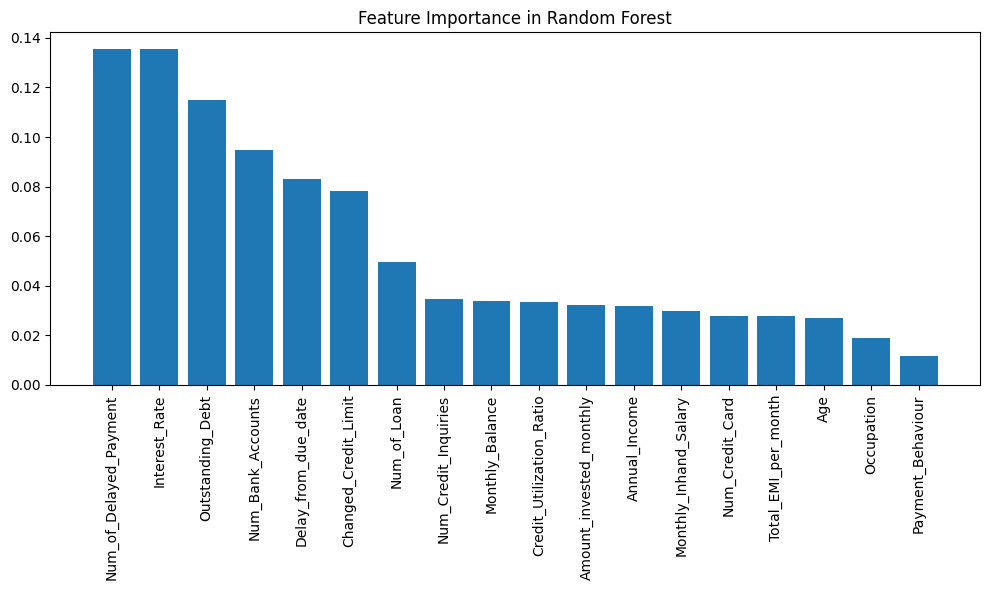

In [ ]:
# Feature Importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()
